In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import eval_util
import os
import pred_util
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def show_log(dir_name, fold='1',col=None, show_params=True):
    log_file_path = '/data/pneumo_log/val_' +fold + '/' + dir_name + '/training.log'
    log = pd.read_csv(log_file_path)
    if col is not None:
        log = log[col]
    log.plot(x='epoch')
#     if show_params:
#         show_train_params(dir_name)
    return log

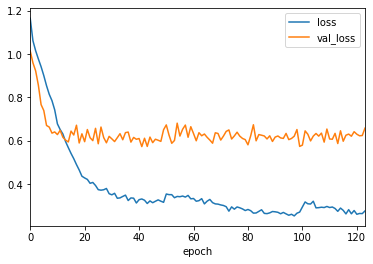

In [31]:
log = show_log('2019_0816_1408',fold='1',col=['loss', 'val_loss','epoch'])


In [32]:
best_index = log['val_loss'].idxmin()
log.iloc[best_index]

loss         0.331737
val_loss     0.573088
epoch       41.000000
Name: 41, dtype: float64

In [128]:
fold='1'
dir_name = '2019_0816_1408'
log_file_path = '/data/pneumo_log/val_' +fold + '/' + dir_name + '/training.log'
log = pd.read_csv(log_file_path)

In [129]:
cols = ['epoch',
      'dice_coef_flat',
      'val_dice_coef_flat',
      'val_dice_coef',
      'dice_coef',
      'my_dice_metric',
      'val_my_dice_metric']


In [135]:
# log

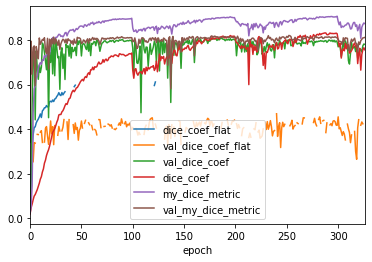

In [136]:
log = show_log('2019_0815_1742',fold='1',col=cols)


In [137]:
best_index = log['val_my_dice_metric'].idxmax()
log.iloc[best_index]

epoch                 252.000000
dice_coef_flat               NaN
val_dice_coef_flat           NaN
val_dice_coef           0.799714
dice_coef               0.798135
my_dice_metric          0.883354
val_my_dice_metric      0.820407
Name: 252, dtype: float64

In [138]:
# log

In [ ]:

# pred_util.save_preds_all_models(model_base_path='/data/pneumo_log/val_1/2019_0815_1742/',
#                      data_path='/data/pneumo/fold/1/',
#                      tta=False)
pred_util._save_preds(model_path='/data/pneumo_log/val_1/2019_0815_1742/best_weights.hdf5', data_path='/data/pneumo/fold/1/')


start pred with /data/pneumo_log/val_1/2019_0815_1742/best_weights.hdf5
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.

  0%|          | 0/2135 [00:00<?, ?it/s]

saving dirs: /data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/



 35%|███▍      | 740/2135 [02:51<04:37,  5.03it/s]

In [6]:
eval_util.eval_all_models_pred(pred_data_dir_base='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/',
                               ensemble=True, score_column_name='score')

start ensemble...
for /data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/, best score is 0.7775175644028103 at thresh=1.0



100%|██████████| 2135/2135 [00:08<00:00, 241.41it/s]

for /data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_2/, best score is 0.7775175644028103 at thresh=1.0



100%|██████████| 2135/2135 [00:48<00:00, 44.40it/s]

for /data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_3/, best score is 0.7775175644028103 at thresh=1.0



100%|██████████| 2135/2135 [00:57<00:00, 37.05it/s]

for /data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_1/, best score is 0.7775175644028103 at thresh=1.0



100%|██████████| 2135/2135 [01:05<00:00, 32.40it/s]

In [9]:
pd.read_csv('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/thresh_evaluation.csv').groupby('thresh').mean()


,score
thresh,
0.00,0.005623
0.05,0.005623
0.10,0.005623
0.15,0.005623
0.20,0.005623
0.25,0.005623
0.30,0.005623
0.35,0.005623
0.40,0.005623


In [ ]:
pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/'
df= eval_util.eval_all_pred(pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/')
# df.groupby('thresh').mean()


 21%|██▏       | 454/2135 [00:24<01:32, 18.26it/s]

In [17]:
df.groupby('thresh').mean()

,score
thresh,
0.00,0.005623
0.05,0.005623
0.10,0.005623
0.15,0.005623
0.20,0.005623
0.25,0.005623
0.30,0.005623
0.35,0.005623
0.40,0.005623


## Subimssion

In [8]:
pd.read_csv('/data/pneumo_log/val_1/val_predictions/2019_0808_0447/thresh_evaluation.csv').groupby('thresh').mean()


,score
thresh,
0.00,0.005556
0.05,0.820000
0.10,0.819781
0.15,0.819616
0.20,0.819449
0.25,0.819298
0.30,0.819603
0.35,0.819906
0.40,0.819689


In [6]:
import submission_util
model_path = '/data/pneumo_log/val_1/2019_0808_0447/best_weights.hdf5'
thresh=0.05
submission_util.make_submission(model_path, thresh)

100%|██████████| 1372/1372 [16:47<00:00,  1.41it/s]


In [20]:
glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/*')

[autoreload of eval_util failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/yusuke/work/siim_pneumo/eval_util.py", line 22
    

['/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.2993.1517875175.586359.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.3991.1517875180.551936.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.4267.1517875182.25165.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.11516.1517875233.300096.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.4864.1517875185.165826.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.4669.1517875184.50463.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.10320.1517875223.142884.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.0.7230010.3.1.4.8323329.3744.1517875179.255362.npy',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/1.2.276.

In [4]:
glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/*/*/')

['/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/binary_thresh_1.0/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_2/binary_thresh_1.0/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_3/binary_thresh_1.0/',
 '/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_1/binary_thresh_1.0/']

In [23]:
np_list = glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/*.npy')
np_list2 = glob('/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_1/*.npy')


In [26]:
d = np.load(np_list[0])[()]
print(np_list[0])
d2 = np.load(np_list2[0])[()]
print(np_list2[0])

/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/1.2.276.0.7230010.3.1.4.8323329.2993.1517875175.586359.npy
/data/pneumo_log/val_1/val_predictions/2019_0815_1742/snapshot_model_1/1.2.276.0.7230010.3.1.4.8323329.2993.1517875175.586359.npy


In [25]:
d2['pred']

array([[1.12308678e-08, 1.12308678e-08, 2.30089086e-08, ...,
        1.29375195e-08, 6.02235284e-09, 6.02235284e-09],
       [1.12308678e-08, 1.12308678e-08, 2.30089086e-08, ...,
        1.29375195e-08, 6.02235284e-09, 6.02235284e-09],
       [1.01733821e-08, 1.01733821e-08, 2.11249223e-08, ...,
        1.23808510e-08, 5.78418025e-09, 5.78418025e-09],
       ...,
       [4.38097031e-10, 4.38097031e-10, 7.60373986e-10, ...,
        1.60745106e-09, 1.30454070e-09, 1.30454070e-09],
       [4.08071216e-10, 4.08071216e-10, 5.67788261e-10, ...,
        1.44937595e-09, 1.27300703e-09, 1.27300703e-09],
       [4.08071216e-10, 4.08071216e-10, 5.67788261e-10, ...,
        1.44937595e-09, 1.27300703e-09, 1.27300703e-09]], dtype=float32)

In [22]:
d['pred']

array([[5.4602381e-08, 5.4602381e-08, 1.8334893e-07, ..., 4.1430908e-09,
        4.6781339e-09, 4.6781339e-09],
       [5.4602381e-08, 5.4602381e-08, 1.8334893e-07, ..., 4.1430908e-09,
        4.6781339e-09, 4.6781339e-09],
       [4.9903168e-08, 4.9903168e-08, 2.4873862e-07, ..., 3.6275298e-09,
        4.0960035e-09, 4.0960035e-09],
       ...,
       [5.0026111e-10, 5.0026111e-10, 4.4741866e-10, ..., 1.6448846e-08,
        1.8765990e-08, 1.8765990e-08],
       [5.6353100e-10, 5.6353100e-10, 5.0241777e-10, ..., 1.8657305e-08,
        2.1286645e-08, 2.1286645e-08],
       [5.6353100e-10, 5.6353100e-10, 5.0241777e-10, ..., 1.8657305e-08,
        2.1286645e-08, 2.1286645e-08]], dtype=float32)